# KAGGLE-NYC-AIRBNB

This Jupyter Notebook file contains parts of the code for the final project, but with added testing/debugging code and quick visualizations.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("AB_NYC_2019.csv", index_col=0)
print("Initial size:",len(data), "x", len(data.columns))
# Removing the columns with a lot (20%) of missing values
data = data.drop(columns=['last_review', 'reviews_per_month'])
# Removing the rows with some missing values (37 rows)
data = data.dropna()
data

Initial size: 48895 x 15


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27


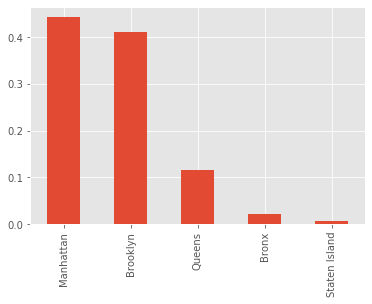

In [8]:
(data['neighbourhood_group'].value_counts()/sum(data['neighbourhood_group'].value_counts())).plot(kind='bar')

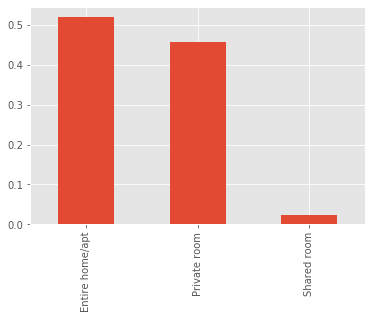

In [9]:
(data['room_type'].value_counts()/sum(data['room_type'].value_counts())).plot(kind='bar')

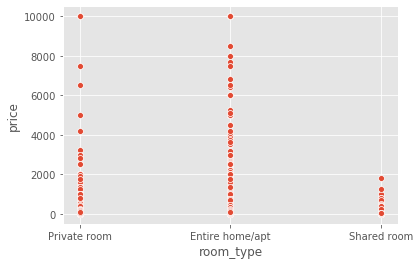

In [18]:
sns.scatterplot(x ="room_type", y ="price", data = data)

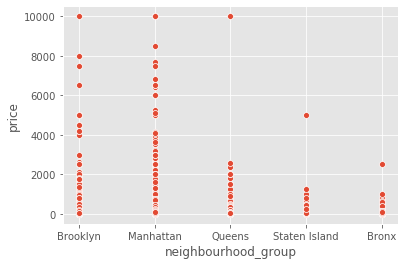

In [20]:
sns.scatterplot(x ="neighbourhood_group", y ="price", data = data)

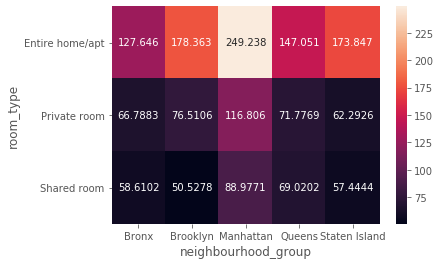

In [46]:
tab = pd.crosstab(data['room_type'],data['neighbourhood_group'], aggfunc='mean', values=data['price'])
sns.heatmap(tab,annot=True, fmt='g')

In [ ]:
tab2 = pd.crosstab(data['neighbourhood'],data['room_type'], aggfunc='mean', values=data['price'])
tab2.sort_values('neighbourhood', ascending=False).plot(kind='barh', figsize=(10,70))

In [ ]:
plt.figure(figsize=(10,50))
data['price'].groupby(data['neighbourhood']).mean().sort_values().plot(kind='barh')

In [ ]:
# Itemset mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Setup data
# ...
apriori(data, min_support=5/len(data), use_colnames=True)

In [5]:
data.price.max()

10000

<AxesSubplot:title={'center':'Price'}>

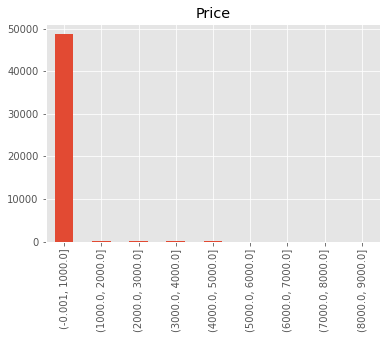

In [7]:
data2 = data.copy()
price_cats1 = pd.cut(data2['price'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000], include_lowest=True)
price_cats1.value_counts(sort=False).plot(kind='bar', figsize=(6,4), title='Price')

<AxesSubplot:title={'center':'Price'}>

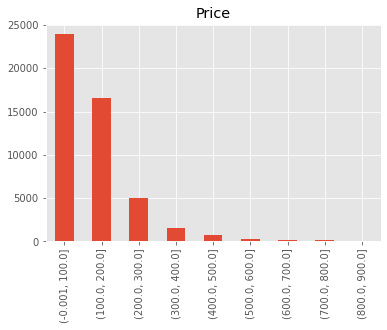

In [8]:
price_cats2 = pd.cut(data2['price'], bins=[0,100,200,300,400,500,600,700,800,900], include_lowest=True)
price_cats2.value_counts(sort=False).plot(kind='bar', figsize=(6,4), title='Price')

1    25393
0    22306
2     1159
Name: room_type, dtype: int64


<AxesSubplot:>

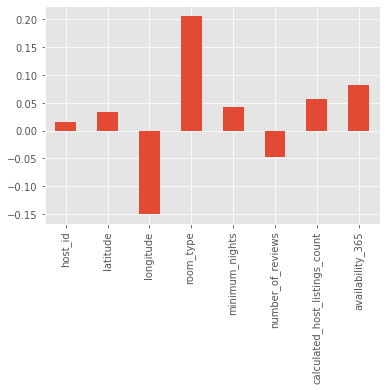

In [16]:
data2 = data2.replace('Private room', 0)
data2 = data2.replace('Entire home/apt', 1)
data2 = data2.replace('Shared room', 2)
print(data2.room_type.value_counts())
data2.drop(columns=['price']).corrwith(data2['price']).plot(figsize=(6,4), kind='bar')

<AxesSubplot:>

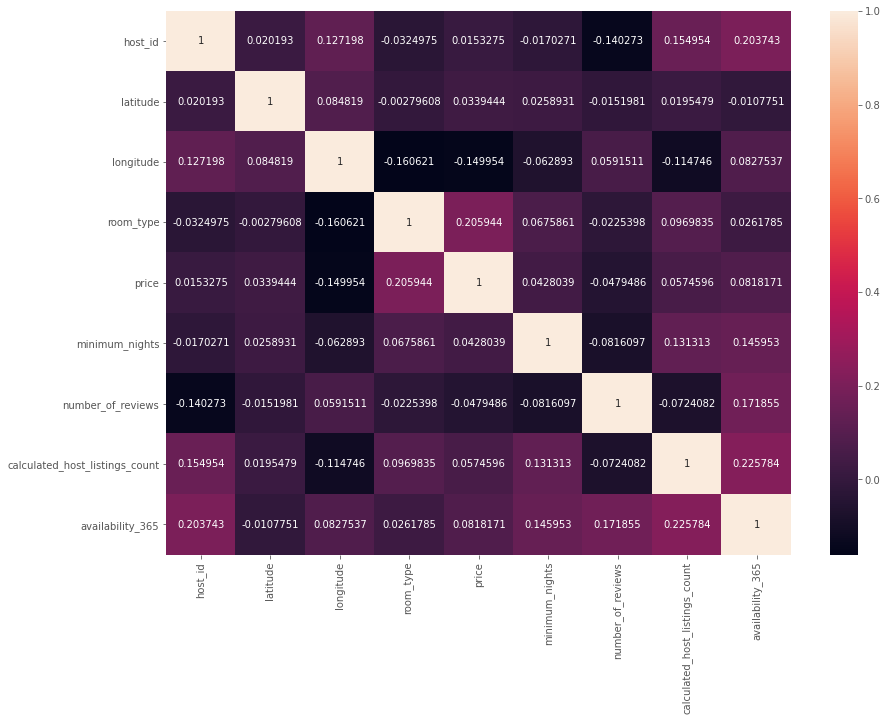

In [17]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,10
sns.heatmap(data2.corr(),annot=True, fmt='g')

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['price', 'name', 'host_name', 'neighbourhood_group']), 
                                                    data2['price'], test_size = 0.30, random_state = 0)

In [108]:
train = X_train.copy()
train['source'] = 'train'
test = X_test.copy()
test['source'] = 'test'

data3 = pd.concat([train, test])

data_dum = pd.get_dummies(data3, columns=data3.drop(columns=['source']).select_dtypes(object).columns)
data_dum.head()

,host_id,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,source,neighbourhood_Allerton,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
id,,,,,,,,,,,,,,,,,,,,,
6323975,32904968,40.75815,-73.99374,2,1,0,1,0,train,0,...,0,0,0,0,0,0,0,0,0,0
26985149,1836803,40.68872,-73.93183,1,3,1,1,17,train,0,...,0,0,0,0,0,0,0,0,0,0
26925980,38593087,40.70685,-73.96663,0,1,25,2,64,train,0,...,0,0,0,1,0,0,0,0,0,0
35600877,163625145,40.64468,-73.99026,0,2,2,3,180,train,0,...,0,0,0,0,0,0,0,0,0,0
35985735,70538107,40.68834,-73.90714,0,1,0,1,16,train,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
train = data_dum[data_dum.source == 'train'].drop(columns=['source'])
test = data_dum[data_dum.source == 'test'].drop(columns=['source'])

In [146]:
from sklearn.linear_model import LinearRegression
df = pd.DataFrame({'id': test.index, 'price':0, 'actual_price': 0})
reg = LinearRegression().fit(train, y_train)
df['price'] = reg.predict(test)

df

,id,price,actual_price
0,22095324,102.623776,0
1,36480292,165.216835,0
2,10729951,59.515649,0
3,4103970,142.358461,0
4,23337201,97.323699,0
...,...,...,...
14653,15067291,99.567712,0
14654,14716155,76.810459,0
14655,11023993,57.059050,0
14656,13264690,96.184047,0


In [149]:
data[data.index == 13264690]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
13264690,Beautiful and Comfy Private Room,38815234,Viviana,Manhattan,Harlem,40.82605,-73.94219,Private room,55,3,60,2,246
